In [1]:
# WORK IN PROGRESS

A more complex example
======================

Here, we are going to learn how to use *pyKasso* with a little more complex example than the [example_01_quick_introduction.ipynb](example_01_quick_introduction.ipynb).

This example is intended to show more specifics functionalities and to understand how python loops can be used to perform several simulations.

Here, we are going to use the datafiles from the Betteraz's catchment.

Create a new project
--------------------

First, we need to import the pyKasso module:

In [1]:
import pykasso as pk

Betteraz's datafiles are already integrated in the *pyKasso* module. <br>
With the ``get_settings()`` function, the module create a copy of the default settings file on the directory where the script is executed. <br>
If the ``example`` argument is ``True``, the function will provide us all the settings file from the Betteraz's catchment.  

In [2]:
#pk.get_settings(example=True)

The function created a directory named ``inputs``. Inside, we can find all the settings files required to reproduce the Betteraz's catchment. <br>

We can now create an instance of the ``SKS`` class and give the relative path of a settings file.

In [3]:
tsanfleuron = pk.SKS('inputs/tsanfleuron598x789_2.yaml')

CAUTION: You are using the development version of this package.


In [4]:
#tsanfleuron.set_data_has_polygon(True) 
#tsanfleuron.update_polygon()

Visualize the generated environment
-------------------------------------
	
Let's have a look on the geological settings:

In [5]:
#for data in ["geology", "faults", "fractures", "topography", "orientationx", "orientationy"]:
#    betteraz.show_catchment(data=data)

We can also visualize the data cut with the polygon delimitations:

In [6]:
#for data in ["geology", "faults", "fractures", "topography", "orientationx", "orientationy"]:
    #betteraz.show_catchment(data=data, mask=True)

Compute karst network and tweak parameters
------------------------------------------

We can simulate different karst network by changing some parameters. There is a ``get`` and a ``set`` method for almost each parameter.

CAUTION: You are using the development version of this package.


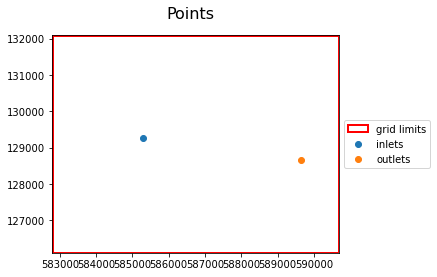


 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\salamina\.conda\envs\pykasso\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\salamina\.conda\envs\pykasso\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


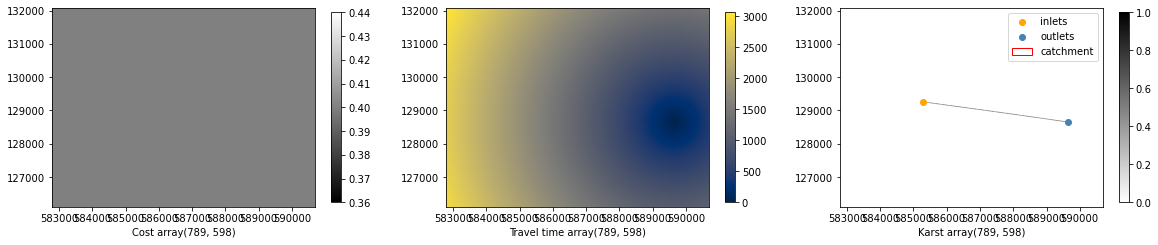

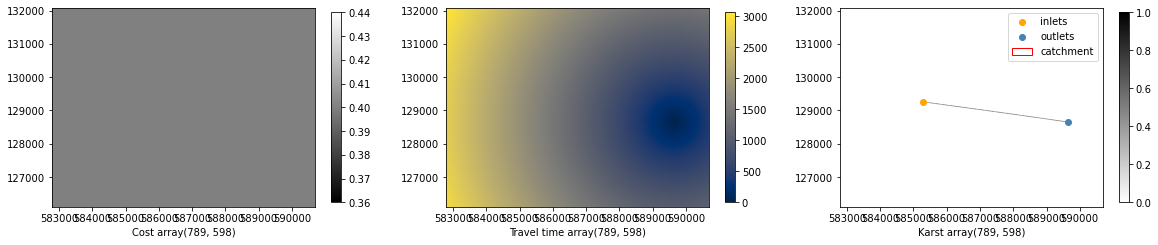

In [2]:
%matplotlib inline
import pykasso as pk
tsanfleuron = pk.SKS('inputs/tsanfleuron598x789_2.yaml')
tsanfleuron.points.show()
tsanfleuron.compute_karst_network()
tsanfleuron.show()

#tsanfleuron.geology.data["surface"]
#tsanfleuron.inlets

In [ ]:
#tsanfleuron.karst_simulations[0].network
%matplotlib qt
tsanfleuron.show_network(simplify=True)


In [54]:
import pandas as  pd
nodes = tsanfleuron.karst_simulations[0].network['nodes']
nodes_simple = tsanfleuron.karst_simulations[0].network['karstnet'].graph_simpl.nodes  #get indices of only the nodes in the simplified graph
nodes_simple = {key: nodes[key] for key in nodes_simple}   #make df of only the nodes in the simplified graph, for plotting
edges = tsanfleuron.karst_simulations[0].network['edges']
edges_simple = tsanfleuron.karst_simulations[0].network['karstnet'].graph_simpl.edges  #get only the edges in the simplified graph
edges_simple = {i: edge for i,edge in enumerate(edges_simple)}   #make df of only the edges in the simplified graph, for p
nodes = pd.DataFrame.from_dict(nodes_simple, orient='index', columns=['x','y','type']) #convert to pandas for easier plotting
edges = pd.DataFrame.from_dict(edges_simple, orient='index', columns=['inNode','outNode'])

In [55]:
print(nodes)
print(edges)

            x         y     type
0    585280.0  129252.0    inlet
476  589650.0  128650.0  outfall
   inNode  outNode
0       0      476


In [56]:
nodes['Z'] = [2450,1552]
nodes['Name'] = ['inflow_test','glarey_spring']
nodes.rename(columns = {'x':'X', 'y':'Y'}, inplace = True)
nodes = nodes[['X','Y','Z','type','Name']]

edges['Name']=['1']
edges.rename(columns = {'inNode':'InNode', 'outNode':'OutNode'}, inplace = True)

print(nodes)
print(edges)

            X         Y     Z     type           Name
0    585280.0  129252.0  2450    inlet    inflow_test
476  589650.0  128650.0  1552  outfall  glarey_spring
   InNode  OutNode Name
0       0      476    1


In [57]:


#########################################################################################

def set_outfalls(nodes, outtype='FREE', stage='', tidegate='NO'):
    
    '''Create outfalls dataframe from node data.
    Inputs:
    nodes:      pandas df with all nodes, and columns: X, Y, Z, type, Name. Type is either 'junction', or 'outfall'
    *SWMMargs:  can be either a single value or a list of same length as number of junctions. See SWMM doc for details.'''
    
    outfalls = nodes[nodes.type=='outfall']                                #split nodes into only outfall-type nodes(not junctions)
    outfalls.drop(labels=['X','Y','type'], axis='columns', inplace=True)   #drop unneeded columns
    outfalls.rename({'Z':'InvertElev'},    axis='columns', inplace=True)   #rename to SWMM's column names
    outfalls['OutType']  = 'FREE'                                          #add required columns
    outfalls['Stage']    = ''
    outfalls['TideGate'] = 'NO'
    colnames = ['Name','InvertElev','OutType','Stage','TideGate']           #list of column names in the correct order
    outfalls = outfalls.reindex(columns=colnames)                           #reorder the column names
    
    return outfalls




In [58]:
outfall = set_outfalls(nodes)
outfall

C:\Users\salamina\AppData\Local\Temp\ipykernel_5904\1303929247.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outfalls.drop(labels=['X','Y','type'], axis='columns', inplace=True)   #drop unneeded columns
C:\Users\salamina\AppData\Local\Temp\ipykernel_5904\1303929247.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outfalls.rename({'Z':'InvertElev'},    axis='columns', inplace=True)   #rename to SWMM's column names
C:\Users\salamina\AppData\Local\Temp\ipykernel_5904\1303929247.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,Name,InvertElev,OutType,Stage,TideGate
476,glarey_spring,1552,FREE,,NO


In [59]:
#########################################################################################

def set_conduits(links, nodes, dim=3, manningN=0.01, inoffset='*', outoffset='*', initflow=0, maxflow=0):

    '''Create conduits dataframe from link and node data.
    Inputs:
    links:      pandas df with all links, and columns: InNode, OutNode, Name
    nodes:      pandas df with all nodes, and columns: X, Y, Z, type, Name. Type is either 'junction', or 'outfall'
    dim:        number of dimensions (2 or 3)
    *SWMMargs:  can be either a single value or a list of same length as number of junctions. See SWMM doc for details.'''
    
    conduits = links.copy()                                      #create a dataframe by copying links
    print(conduit)
    fromX = nodes.X.loc[conduits.InNode]                            #calculate coordinates for link start and end points
    fromY = nodes.Y.loc[conduits.InNode]
    toX   = nodes.X.loc[conduits.OutNode]
    toY   = nodes.Y.loc[conduits.OutNode]
    if dim==2:
        conduits['Length']    = [((toX.iloc[ind] - fromX.iloc[ind])**2 + (toY.iloc[ind] - fromY.iloc[ind])**2)**0.5 for ind in links.index]  #calculate length using distance formula and add it as a new column
    if dim==3:
        fromZ = nodes.Z.loc[conduits.InNode]
        toZ   = nodes.Z.loc[conduits.OutNode]
        conduits['Length']    = [((toX.iloc[ind] - fromX.iloc[ind])**2 + 
                                  (toY.iloc[ind] - fromY.iloc[ind])**2 + 
                                  (toZ.iloc[ind] - fromZ.iloc[ind])**2)**0.5 for ind in links.index] #calculate distance between points and add as new column
    conduits['ManningN']  = manningN                                 #add other columns
    conduits['InOffset']  = inoffset
    conduits['OutOffset'] = outoffset
    conduits['InitFlow']  = initflow
    conduits['MaxFlow']   = maxflow
    colnames = ['Name','InNode','OutNode','Length','ManningN','InOffset','OutOffset','InitFlow','MaxFlow']  #list of column names in the correct order
    conduits = conduits.reindex(columns=colnames)                                                           #reorder the column names
    
    return conduits


In [60]:
conduits = set_conduits(edges, nodes)
conduits

  Name  InNode  OutNode       Length  ManningN InOffset OutOffset  InitFlow  \
0    1     NaN      NaN  4501.744995      0.01        *         *         0   

   MaxFlow  
0        0  


,Name,InNode,OutNode,Length,ManningN,InOffset,OutOffset,InitFlow,MaxFlow
0,1,0,476,4501.744995,0.01,*,*,0,0


In [78]:
#########################################################################################

def set_junctions(nodes, maxdepth=0, initdepth=0, surdepth=200, aponded=0):
    
    '''Create junctions dataframe from node data.
    Inputs:
    nodes:      pandas df with all nodes, and columns: X, Y, Z, type, Name. Type is either 'junction', or 'outfall'
    *SWMMargs:  can be either a single value or a list of same length as number of junctions. See SWMM doc for details.'''
                               
    junctions = nodes.loc[((nodes['type'] == 'junction')|(nodes['type'] == 'inlet'))] #split nodes into only junction-type nodes(not outfalls)
    junctions.drop(labels=['X','Y','type'], axis='columns', inplace=True)   #drop unneeded columns
    junctions.rename({'Z':'InvertElev'},    axis='columns', inplace=True)   #rename to SWMM's column names
    junctions['MaxDepth']  = maxdepth                                              #add required columns
    junctions['InitDepth'] = initdepth
    junctions['SurDepth']  = surdepth
    junctions['Aponded']   = aponded
    colnames = ['Name','InvertElev','MaxDepth','InitDepth','SurDepth','Aponded']    #list of column names in the correct order
    junctions = junctions.reindex(columns=colnames)                                 #reorder the column names
    
    return junctions


In [79]:
jonctions = set_junctions(nodes)
jonctions

C:\Users\salamina\AppData\Local\Temp\ipykernel_5904\2037295518.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junctions.drop(labels=['X','Y','type'], axis='columns', inplace=True)   #drop unneeded columns
C:\Users\salamina\AppData\Local\Temp\ipykernel_5904\2037295518.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junctions.rename({'Z':'InvertElev'},    axis='columns', inplace=True)   #rename to SWMM's column names
C:\Users\salamina\AppData\Local\Temp\ipykernel_5904\2037295518.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,Name,InvertElev,MaxDepth,InitDepth,SurDepth,Aponded
0,inflow_test,2450,0,0,200,0


In [87]:
#########################################################################################

def set_inflows(nodes, Constituent = 'FLOW', TimeSeries='Upsteam_inflow', Type=' FLOW', Mfactor=1, Sfactor=1, Baseline = None, Pattern = None):
    
    '''Create inflows dataframe from node data.
    Inputs:
    nodes:      pandas df with all nodes, and columns: X, Y, Z, type, Name. Type is either 'junction', or 'outfall'
    *SWMMargs:  can be either a single value or a list of same length as number of inflows. See SWMM doc for details.'''
    
    inflows  = nodes[nodes.type=='inlet']                              #split nodes into only junction-type nodes(not outfalls)
    inflows.drop(labels=['Name','X','Y','Z','type'], axis='columns', inplace=True)   #drop unneeded columns
    ## Find the right node
    inflows['Constituent'] = Constituent                                            #add required columns
    inflows['Time Series'] = TimeSeries
    inflows['Type'] = Type
    inflows['Mfactor'] = Mfactor
    inflows['Sfactor'] = Sfactor
    inflows['Baseline'] = Baseline
    inflows['Pattern'] = Pattern
    colnames = ['Name','Constituent','Time Series','Type','Mfactor','Sfactor','Baseline','Pattern']    #list of column names in the correct order
    inflows = inflows.reindex(columns=colnames)                                 #reorder the column names
    
    return inflows

In [88]:
inflows = set_inflows(nodes)
inflows

C:\Users\salamina\AppData\Local\Temp\ipykernel_5904\2672145251.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflows.drop(labels=['X','Y','Z','type'], axis='columns', inplace=True)   #drop unneeded columns
C:\Users\salamina\AppData\Local\Temp\ipykernel_5904\2672145251.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflows['Constituent'] = Constituent                                            #add required columns
C:\Users\salamina\AppData\Local\Temp\ipykernel_5904\2672145251.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,Name,Constituent,Time Series,Type,Mfactor,Sfactor,Baseline,Pattern
0,inflow_test,FLOW,Upsteam_inflow,FLOW,1,1,None,None


In [19]:
tsanfleuron.show( data = tsanfleuron.karst_simulations[-1], title="bidule", probability=True)

TypeError: show() got an unexpected keyword argument 'probability'

In [ ]:
# Simulation de base
tsanfleuron.update_fractures()
tsanfleuron.set_inlets_mode('composite')
tsanfleuron.set_inlets_number(10)
tsanfleuron.update_inlets()
tsanfleuron.compute_karst_network()

# Simulation modifié 1
tsanfleuron.update_importance....
tsanfleuron.compute_karst_network()

# Simulation modifié 1

tsanfleuron.show()





 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


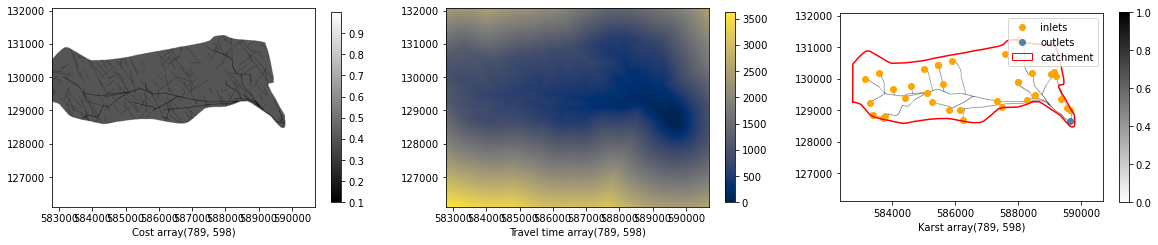

Rasterizing: 100%|██████████████████████████████████████████████████████████████| 1021/1021 [00:00<00:00, 10621.60it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1043/1043 [00:00<00:00, 9471.60it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1034/1034 [00:00<00:00, 8474.70it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1059/1059 [00:00<00:00, 9529.71it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity

 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1077/1077 [00:00<00:00, 5626.73it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1027/1027 [00:00<00:00, 8172.70it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity

 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1054/1054 [00:00<00:00, 6512.87it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1019/1019 [00:00<00:00, 8204.64it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1061/1061 [00:00<00:00, 8559.46it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1018/1018 [00:00<00:00, 8135.74it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1042/1042 [00:00<00:00, 7915.46it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1040/1040 [00:00<00:00, 8276.04it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1023/1023 [00:00<00:00, 8731.87it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1039/1039 [00:00<00:00, 8405.27it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1038/1038 [00:00<00:00, 7767.35it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1052/1052 [00:00<00:00, 9620.57it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1019/1019 [00:00<00:00, 9318.70it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1005/1005 [00:00<00:00, 9190.72it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|█████████████████████████████████████████████████████████████████| 979/979 [00:00<00:00, 6212.74it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1015/1015 [00:00<00:00, 8929.20it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1003/1003 [00:00<00:00, 9280.23it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1055/1055 [00:00<00:00, 8065.12it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1009/1009 [00:00<00:00, 8393.17it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1059/1059 [00:00<00:00, 7978.83it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1007/1007 [00:00<00:00, 6491.89it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1041/1041 [00:00<00:00, 8292.95it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1073/1073 [00:00<00:00, 7997.67it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1023/1023 [00:00<00:00, 7823.38it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1026/1026 [00:00<00:00, 7455.12it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1077/1077 [00:00<00:00, 9301.56it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|█████████████████████████████████████████████████████████████████| 962/962 [00:00<00:00, 8537.65it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|█████████████████████████████████████████████████████████████████| 984/984 [00:00<00:00, 8046.50it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 8117.93it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1063/1063 [00:00<00:00, 9469.89it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1042/1042 [00:00<00:00, 8180.62it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1022/1022 [00:00<00:00, 7690.32it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1042/1042 [00:00<00:00, 6450.39it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1069/1069 [00:00<00:00, 8678.80it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1027/1027 [00:00<00:00, 9193.60it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1098/1098 [00:00<00:00, 8948.97it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1048/1048 [00:00<00:00, 7480.29it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1038/1038 [00:00<00:00, 8459.97it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1055/1055 [00:00<00:00, 8346.42it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1030/1030 [00:00<00:00, 7707.05it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1005/1005 [00:00<00:00, 8397.35it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1089/1089 [00:00<00:00, 8569.47it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1023/1023 [00:00<00:00, 8881.71it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1032/1032 [00:00<00:00, 8212.30it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1011/1011 [00:00<00:00, 7951.29it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1049/1049 [00:00<00:00, 9270.69it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1034/1034 [00:00<00:00, 8337.42it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1040/1040 [00:00<00:00, 8890.29it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|██████████████████████████████████████████████████████████████| 1033/1033 [00:00<00:00, 10549.28it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|█████████████████████████████████████████████████████████████████| 985/985 [00:00<00:00, 6767.02it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1036/1036 [00:00<00:00, 8052.43it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 6439.98it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1016/1016 [00:00<00:00, 8119.61it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1016/1016 [00:00<00:00, 7328.84it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|█████████████████████████████████████████████████████████████████| 942/942 [00:00<00:00, 9251.77it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1013/1013 [00:00<00:00, 6738.54it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1010/1010 [00:00<00:00, 9103.51it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1038/1038 [00:00<00:00, 7564.01it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1030/1030 [00:00<00:00, 7508.99it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1026/1026 [00:00<00:00, 8718.09it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1004/1004 [00:00<00:00, 9327.49it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1022/1022 [00:00<00:00, 8263.92it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1044/1044 [00:00<00:00, 8538.69it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1008/1008 [00:00<00:00, 8455.01it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|█████████████████████████████████████████████████████████████████| 996/996 [00:00<00:00, 9333.17it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1067/1067 [00:00<00:00, 8988.27it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1020/1020 [00:00<00:00, 8453.82it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|█████████████████████████████████████████████████████████████████| 998/998 [00:00<00:00, 7857.83it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1024/1024 [00:00<00:00, 9133.78it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1040/1040 [00:00<00:00, 8923.87it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1013/1013 [00:00<00:00, 9381.24it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity

 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|██████████████████████████████████████████████████████████████| 1005/1005 [00:00<00:00, 10269.89it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1077/1077 [00:00<00:00, 7059.05it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1002/1002 [00:00<00:00, 8661.01it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1008/1008 [00:00<00:00, 8241.28it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1084/1084 [00:00<00:00, 8719.48it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1034/1034 [00:00<00:00, 8793.91it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|████████████████████████████████████████████████████████████████| 951/951 [00:00<00:00, 10547.23it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1029/1029 [00:00<00:00, 8410.86it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1002/1002 [00:00<00:00, 6549.30it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1016/1016 [00:00<00:00, 7106.74it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1063/1063 [00:00<00:00, 8389.33it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1022/1022 [00:00<00:00, 7844.18it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1052/1052 [00:00<00:00, 8700.16it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1028/1028 [00:00<00:00, 7784.70it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1035/1035 [00:00<00:00, 7871.81it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1045/1045 [00:00<00:00, 7918.54it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|█████████████████████████████████████████████████████████████████| 981/981 [00:00<00:00, 8113.22it/s]



 This network contains  2  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1030/1030 [00:00<00:00, 8018.53it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1074/1074 [00:00<00:00, 8138.64it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1071/1071 [00:00<00:00, 9144.43it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1027/1027 [00:00<00:00, 8061.77it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1012/1012 [00:00<00:00, 8841.24it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1005/1005 [00:00<00:00, 8197.74it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1065/1065 [00:00<00:00, 8045.21it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


Rasterizing: 100%|███████████████████████████████████████████████████████████████| 1011/1011 [00:00<00:00, 7449.26it/s]



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


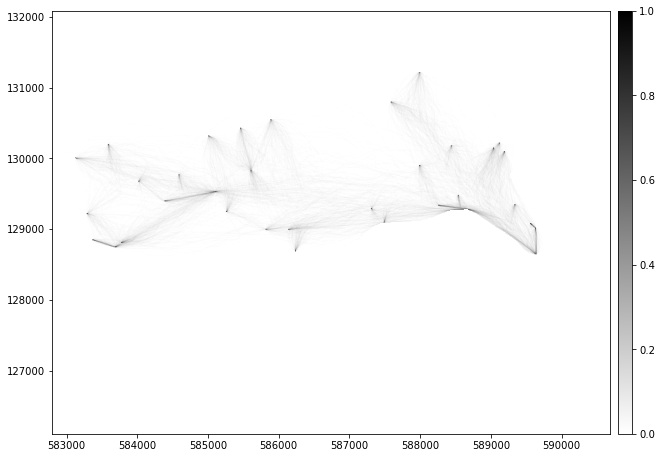

In [6]:
tsanfleuron.compute_karst_network()
tsanfleuron.show()

for i in range(100):
    tsanfleuron.update_fractures()
    #tsanfleuron.set_outlets_mode('random')
    #tsanfleuron.set_outlets_number(1)
    #tsanfleuron.set_inlets_mode('composite')
    #tsanfleuron.set_inlets_number(10)
    #tsanfleuron.update_outlets()
    #tsanfleuron.update_inlets()
    tsanfleuron.compute_karst_network()

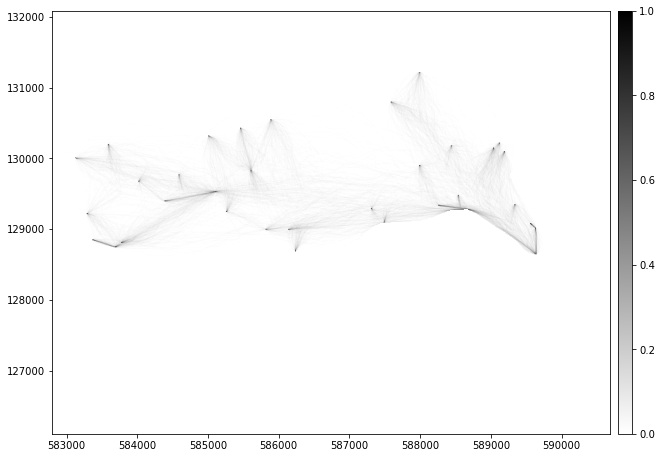

In [7]:
f= tsanfleuron.compute_average_paths()

In [24]:
tsanfleuron.karst_simulations[0].network["nodes"]


{0: [588000.0, 129900.0, 'inlet'],
 1: [588005.0277771156, 129899.17146563927, 'junction'],
 2: [588015.6095929625, 129897.46140474513, 'junction'],
 3: [588025.2713629478, 129895.9125968502, 'junction'],
 4: [588034.8653050929, 129894.35263651042, 'junction'],
 5: [588044.416285717, 129892.81473795579, 'junction'],
 6: [588053.9393161591, 129891.30320663186, 'junction'],
 7: [588063.4366177722, 129889.76657111637, 'junction'],
 8: [588072.9265986625, 129888.24389119518, 'junction'],
 9: [588082.418531639, 129886.73741510467, 'junction'],
 10: [588091.9201030559, 129885.24970266105, 'junction'],
 11: [588101.4307290192, 129883.72931478212, 'junction'],
 12: [588113.4346155709, 129881.82190181792, 'junction'],
 13: [588123.0273613813, 129880.30537081297, 'junction'],
 14: [588134.5027675282, 129878.53227813677, 'junction'],
 15: [588142.1957551084, 129877.32457290827, 'junction'],
 16: [588153.8893843888, 129875.49362533526, 'junction'],
 17: [588161.3623830247, 129874.31308857801, 'jun

AttributeError: 'MaskedArray' object has no attribute 'maps'

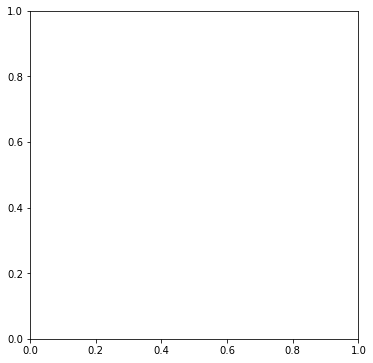

In [12]:
tsanfleuron.show(probability=True)

Now, we can write a loop and change some parameters. For example, let's see the influence of the alpha parameter on the generated karstic networks:

In [8]:
"""
#betteraz = pk.SKS('inputs/test.yaml')
import numpy as np
alphas = [1.7,1.9]#,2.1,2.3,2.5]
nb_frac_fam = len(betteraz.settings['fractures_densities'])


for alpha in alphas:
    #betteraz.set_fractures_alpha(np.full((1, nb_frac_fam), alpha)[0])
    #betteraz.update_inlets()
    #betteraz.update_fractures() # will produce new fractures
    #betteraz.increment_rand_seed()
    #betteraz.shuffle_inlets()
    #betteraz.show_catchment(data='fractures', mask=1)
    #betteraz.update_all()
    betteraz.set_outlets_mode('random')
    betteraz.set_outlets_number(1)
    betteraz.set_inlets_mode('composite')
    betteraz.set_inlets_number(100)
    #betteraz.set_outlets_importance([1,1])
    betteraz.update_outlets()
    betteraz.update_inlets()
    betteraz.compute_karst_network()
    betteraz.show()
    
"""

"\n#betteraz = pk.SKS('inputs/test.yaml')\nimport numpy as np\nalphas = [1.7,1.9]#,2.1,2.3,2.5]\nnb_frac_fam = len(betteraz.settings['fractures_densities'])\n\n\nfor alpha in alphas:\n    #betteraz.set_fractures_alpha(np.full((1, nb_frac_fam), alpha)[0])\n    #betteraz.update_inlets()\n    #betteraz.update_fractures() # will produce new fractures\n    #betteraz.increment_rand_seed()\n    #betteraz.shuffle_inlets()\n    #betteraz.show_catchment(data='fractures', mask=1)\n    #betteraz.update_all()\n    betteraz.set_outlets_mode('random')\n    betteraz.set_outlets_number(1)\n    betteraz.set_inlets_mode('composite')\n    betteraz.set_inlets_number(100)\n    #betteraz.set_outlets_importance([1,1])\n    betteraz.update_outlets()\n    betteraz.update_inlets()\n    betteraz.compute_karst_network()\n    betteraz.show()\n    \n"

In [9]:
#betteraz.karst_simulations
"""
import agd
from agd import Eikonal
from agd.Metrics import Riemann

nx = 3
ny = 3
nz = 3

xmin=-0.5
xmax=2.5

ymin=-1
ymax=5

zmin=-1.5
zmax=7.5

riemannMetric = []                    #this changes at every iteration, but cannot be stored?
fastMarching = agd.Eikonal.dictIn({
'model'             : 'Isotropic2',      #set algorithm from settings file ('Isotropic2', 'Isotropic3', 'Riemann2', 'Riemann3')
'order'             : 2,               #recommended setting: 2 (replace by variable)
'exportValues'      : 1,               #export the travel time field
'exportGeodesicFlow': 1                #export the walker paths (i.e. the conduits)
})

print(fastMarching.keys)
help(fastMarching)

fastMarching.SetRect(                 #give the fast-marching algorithm the model grid
sides=[[ymin, ymax],
       [xmin, xmax],
       [zmin,zmax]],   
dims=[ny, nx, nz])

fastMarching.Axes()
fastMarching.Grid()
"""

"\nimport agd\nfrom agd import Eikonal\nfrom agd.Metrics import Riemann\n\nnx = 3\nny = 3\nnz = 3\n\nxmin=-0.5\nxmax=2.5\n\nymin=-1\nymax=5\n\nzmin=-1.5\nzmax=7.5\n\nriemannMetric = []                    #this changes at every iteration, but cannot be stored?\nfastMarching = agd.Eikonal.dictIn({\n'model'             : 'Isotropic2',      #set algorithm from settings file ('Isotropic2', 'Isotropic3', 'Riemann2', 'Riemann3')\n'order'             : 2,               #recommended setting: 2 (replace by variable)\n'exportValues'      : 1,               #export the travel time field\n'exportGeodesicFlow': 1                #export the walker paths (i.e. the conduits)\n})\n\nprint(fastMarching.keys)\nhelp(fastMarching)\n\nfastMarching.SetRect(                 #give the fast-marching algorithm the model grid\nsides=[[ymin, ymax],\n       [xmin, xmax],\n       [zmin,zmax]],   \ndims=[ny, nx, nz])\n\nfastMarching.Axes()\nfastMarching.Grid()\n"

In [10]:
#betteraz.karst_simulations[0].__dict__.keys()

In [11]:
#betteraz.compare_stats()

In [12]:
## Marche pas quand
# Grille 300*400
# y'a plusieurs outlets